In [1]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import tqdm

import holodeck as holo
from holodeck import utils, plot
from holodeck.constants import YR

mpl.style.use('default')   # avoid dark backgrounds from dark theme vscode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Compare Simple Sample

In [2]:
from holodeck.constants import YR, MSOL
import kalepy as kale

In [86]:
dur1 = 5.0*YR/3.1557600
cad1 = .5*YR/3.1557600
fobs1 = utils.nyquist_freqs(dur1,cad1)
fobs_edges1 = utils.nyquist_freqs_edges(dur1,cad1)
# print('fobs=', fobs)
# print('fobs_edges=',fobs_edges)
print(f"Number of frequency bins: {fobs.size-1}")
print(f"  between [{fobs1[0]*YR:.2f}, {fobs1[-1]*YR:.2f}] 1/yr")
print(f"          [{fobs1[0]*1e9:.2f}, {fobs1[-1]*1e9:.2f}] nHz")
mtot=(1.0e6*MSOL/1.988409870698051, 1.0e8*MSOL/1.988409870698051, 3)
mrat=(1e-1, 1.0, 2)
redz=(1e-3, 1.0, 4)
sam1 = holo.sam.Semi_Analytic_Model(mtot=mtot, mrat=mrat, 
        redz=redz)
print('edges:', sam1.edges)

Number of frequency bins: 24
  between [0.63, 3.16] 1/yr
          [20.00, 100.00] nHz
edges: [array([1.e+39, 1.e+40, 1.e+41]), array([0.1, 1. ]), array([0.001, 0.01 , 0.1  , 1.   ])]


inside sam.gwb(Hard_GW)

In [51]:
fobs_gw_edges1 = fobs_edges1
hard = holo.hardening.Hard_GW
fobs_gw_cents1 = kale.utils.midpoints(fobs_gw_edges1)
fobs_orb_edges1 = fobs_gw_edges1 / 2.0
fobs_orb_cents1 = fobs_gw_cents1 / 2.0

# dynamic_binary_number
edges1, dnum1 = sam1.dynamic_binary_number(hard, fobs_orb=fobs_orb_cents1)
edges1[-1] = fobs_orb_edges1

# integrate (multiply by bin volume) within each
# bin
number1 = utils._integrate_grid_differential_number(edges1, dnum1, freq=False)
number1 = number1 * np.diff(np.log(fobs_gw_edges1))

use_redz1 = sam1._redz_prime[:, :, :, np.newaxis] * np.ones_like(dnum1)


14:22:59 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
14:22:59 INFO : fraction of coalesced binaries: 0.00e+00/9.60e+02 = 0.00e+00 [sam.py:dynamic_binary_number]
14:22:59 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]


compare steps of 
* gravwaves._gws_from_number_grid_integrated_redz(edges, redz, number, realize=1, sum=True)
* single_sources.ss_gws_redz(edges, redz, number, realize=1, loudest = 1, params = False)

In [52]:
gwb1 = holo.gravwaves._gws_from_number_grid_integrated_redz(edges1, use_redz1, number1, 
                                                           realize=1, sum=True)
hc_ss1, hc_bg1 = holo.single_sources.ss_gws_redz(edges1, use_redz1, number1, realize=1, loudest=100, params=False)
# hc_ss_tot = np.sqrt(
hc_tot1 = np.sqrt(np.sum(hc_ss1**2, axis=2)+ hc_bg1**2)

In [85]:
print(np.array(edges1).shape)

(4,)


[3.94610279e-15 2.39726106e-15 1.81829923e-15 1.49797312e-15
 1.28995309e-15 1.14147467e-15 1.02991815e-15 9.42014796e-16
 8.69820786e-16 8.10753471e-16 7.61429369e-16 7.18485086e-16
 6.80322841e-16 6.48027604e-16 6.18991481e-16 5.93296552e-16
 5.70027534e-16 5.48137856e-16 5.28397441e-16 5.10468055e-16
 4.94099016e-16 4.79768468e-16 4.64713912e-16 4.52224025e-16
 4.37603723e-16 4.28337495e-16 4.20828424e-16 4.10146947e-16
 3.96827575e-16 3.88388604e-16 3.77711929e-16 3.70199730e-16
 3.66064325e-16 3.55759769e-16 3.48165908e-16 3.42243937e-16
 3.37143387e-16 3.29387056e-16 3.23764237e-16 3.20569700e-16]
[3.94612039e-15 2.39728973e-15 1.81847979e-15 1.49802618e-15
 1.28978675e-15 1.14162740e-15 1.02970709e-15 9.41847600e-16
 8.70828332e-16 8.11584792e-16 7.61410794e-16 7.17548639e-16
 6.81072224e-16 6.48098924e-16 6.20121994e-16 5.93376919e-16
 5.68867688e-16 5.48131648e-16 5.28426244e-16 5.10765911e-16
 4.94990038e-16 4.79219244e-16 4.65638993e-16 4.51388806e-16
 4.39803370e-16 4.28798

Text(0, 0.5, 'Ratio hc_tot / gwb')

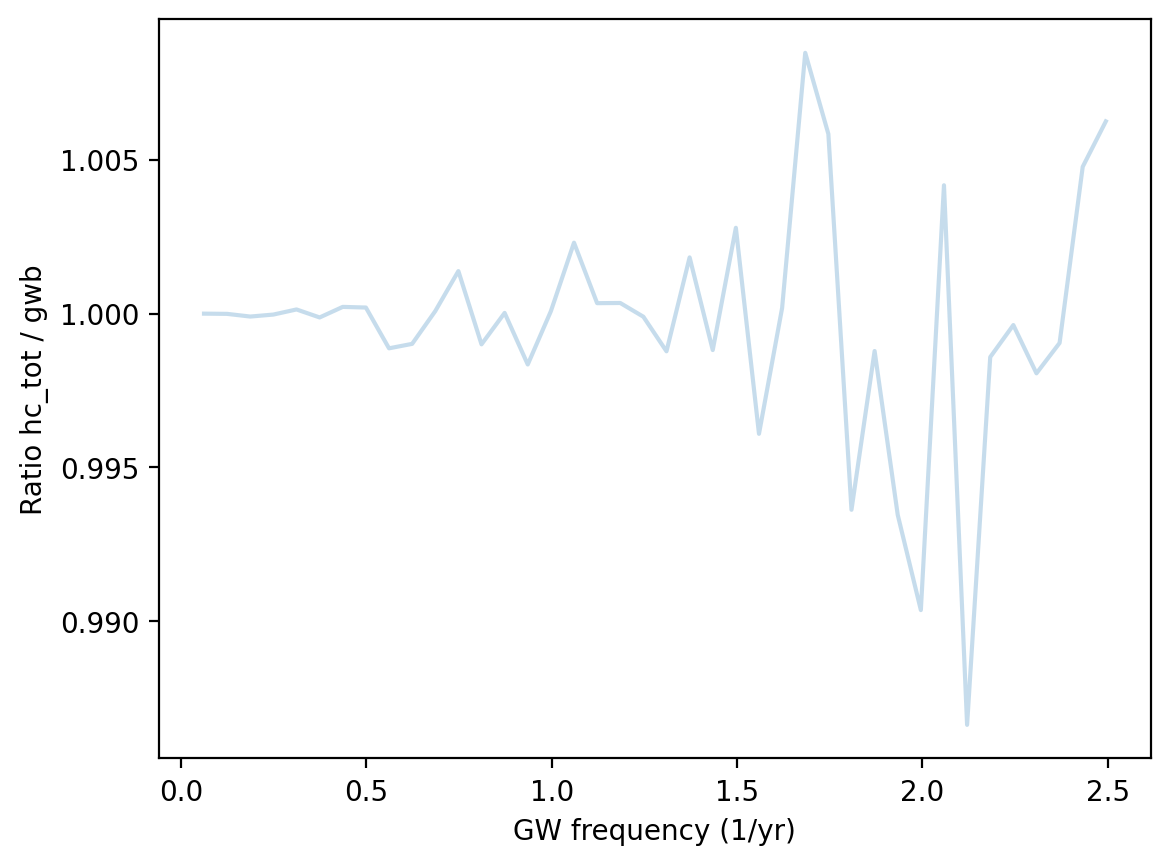

In [53]:
print(hc_bg1.squeeze())
print(gwb1.squeeze())
hc_tot1 = np.sqrt(np.sum(hc_ss1**2, axis=2)+ hc_bg1**2)
print(hc_tot1.shape)
print(gwb1.shape)
for rr in range(len(gwb1[0])):
    plt.plot(fobs1*YR, hc_tot1[:,rr]/gwb1[:,rr], label='hc_tot/gwb', alpha=0.25)

plt.xlabel('GW frequency (1/yr)')
plt.ylabel('Ratio hc_tot / gwb')

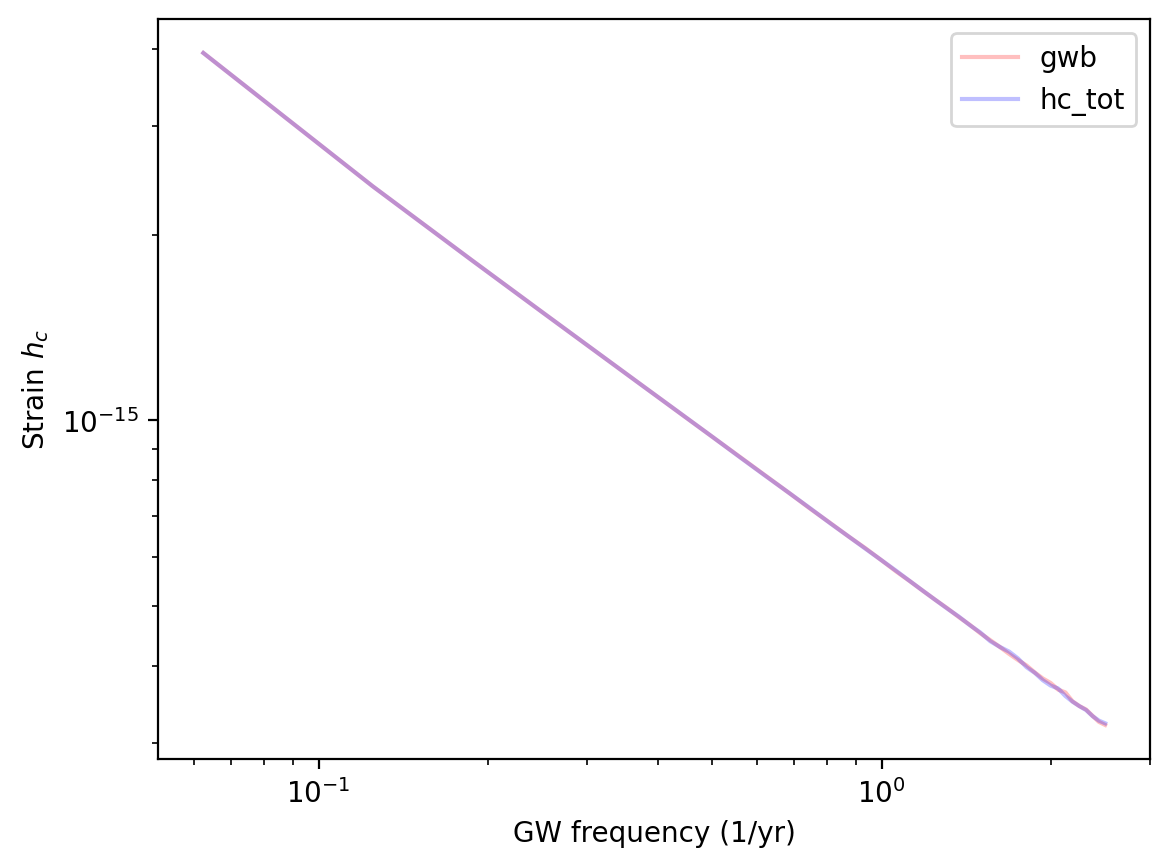

In [55]:
plt.xlabel('GW frequency (1/yr)')
plt.ylabel('Strain $h_c$')

plt.loglog(fobs1*YR, gwb1[:], color='red', alpha=0.25, label='gwb')
plt.loglog(fobs1*YR, hc_tot1[:,0], color='b', alpha=0.25, label='hc_tot')
plt.legend()

### 2 Simple again. more louds

In [66]:
hc_ss2, hc_bg2 = sam1.ss_gwb(fobs_edges1, realize=1, loudest=10)

14:28:01 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
14:28:01 INFO : fraction of coalesced binaries: 0.00e+00/9.60e+02 = 0.00e+00 [sam.py:dynamic_binary_number]
14:28:01 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
edges[-1]: 4.94e-10, 2.03e-09, 6.43e-09, 2.03e-08, 3.41e-08, 3.85e-08, 4.01e-08
dnum: 0.00e+00, 0.00e+00, 0.00e+00, 3.94e+02, 4.63e+07, 1.19e+09, 3.10e+12
number: 0.00e+00, 0.00e+00, 0.00e+00, 9.78e+03, 3.99e+06, 1.84e+08, 5.01e+11
14:28:01 WARNING : Using `redz_prime` for redshift (includes galaxy merger time, but not evolution time) [sam.py:ss_gwb]


In [57]:
gwb2 = sam1.gwb(fobs_edges1, realize=1)

14:24:48 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
14:24:48 INFO : fraction of coalesced binaries: 0.00e+00/9.60e+02 = 0.00e+00 [sam.py:dynamic_binary_number]
14:24:48 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
edges[-1]: 4.94e-10, 2.03e-09, 6.43e-09, 2.03e-08, 3.41e-08, 3.85e-08, 4.01e-08
dnum: 0.00e+00, 0.00e+00, 0.00e+00, 3.94e+02, 4.63e+07, 1.19e+09, 3.10e+12
number: 0.00e+00, 0.00e+00, 0.00e+00, 9.78e+03, 3.99e+06, 1.84e+08, 5.01e+11
14:24:48 WARNING : Using `redz_prime` for redshift (includes galaxy merger time, but not evolution time) [sam.py:gwb]


[3.94608082e-15 2.39720561e-15 1.81848300e-15 1.49803184e-15
 1.28935464e-15 1.14120775e-15 1.02947845e-15 9.42066769e-16
 8.70324143e-16 8.11198052e-16 7.60893147e-16 7.18508869e-16
 6.81385320e-16 6.48043259e-16 6.19442211e-16 5.91454987e-16
 5.69403648e-16 5.47588480e-16 5.28459037e-16 5.10085558e-16
 4.94395328e-16 4.79695827e-16 4.65064497e-16 4.50880467e-16
 4.40235058e-16 4.28680937e-16 4.20099039e-16 4.07731444e-16
 3.98981794e-16 3.89768212e-16 3.82852019e-16 3.73058605e-16
 3.65743059e-16 3.56063425e-16 3.51849720e-16 3.46991294e-16
 3.40304451e-16 3.33940316e-16 3.27037423e-16 3.22998586e-16]
[3.94609296e-15 2.39739202e-15 1.81839021e-15 1.49811165e-15
 1.28992842e-15 1.14145312e-15 1.02976520e-15 9.41352686e-16
 8.70425718e-16 8.11168970e-16 7.61473319e-16 7.18868947e-16
 6.81824761e-16 6.48042551e-16 6.18935850e-16 5.93169178e-16
 5.69622187e-16 5.48784692e-16 5.29331904e-16 5.09883254e-16
 4.94948119e-16 4.78693032e-16 4.66353601e-16 4.52151222e-16
 4.41598032e-16 4.29774

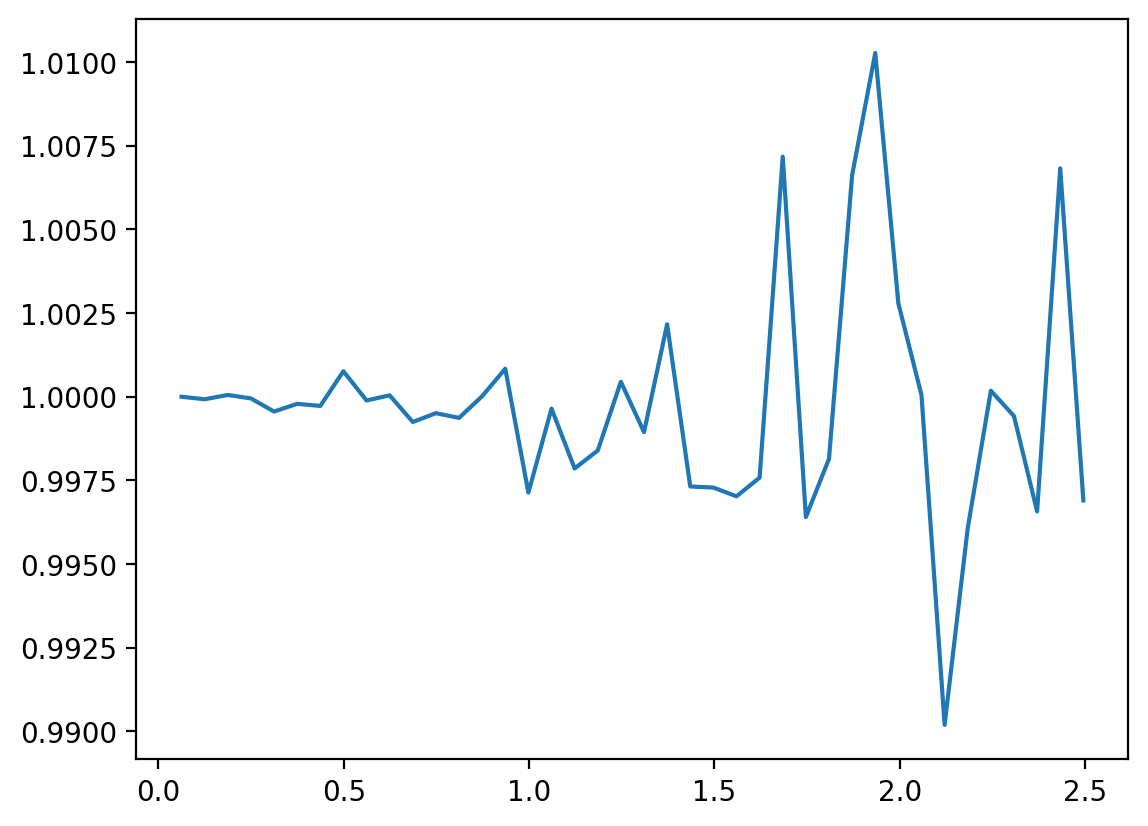

In [59]:
print(hc_bg2.squeeze())
print(gwb2.squeeze())
hc_tot2 = np.sqrt(np.sum(hc_ss2**2, axis=2)+ hc_bg2**2)
print(hc_tot2.shape)
print(gwb2.shape)
plt.plot(fobs1*YR, hc_tot2[:,0]/gwb2[:], label='hc_tot/gwb')

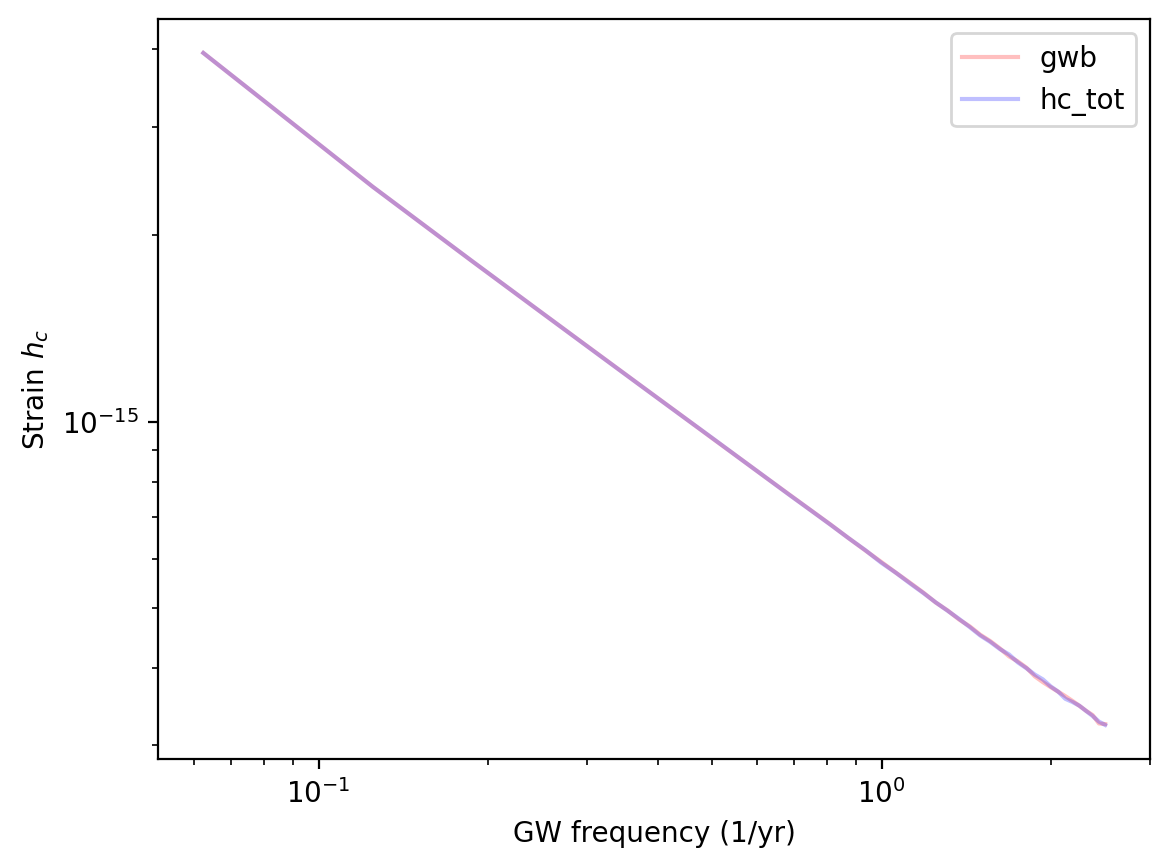

In [60]:
plt.xlabel('GW frequency (1/yr)')
plt.ylabel('Strain $h_c$')

plt.loglog(fobs1*YR, gwb2[:], color='red', alpha=0.25, label='gwb')
plt.loglog(fobs1*YR, hc_tot2[:,0], color='b', alpha=0.25, label='hc_tot')
plt.legend()

For the super simple example they match!!

### 3 Let's try full size SAM:

In [16]:
dur3 = 10.0 *YR
cad3 = 0.2* YR
fobs3 = utils.nyquist_freqs(dur3,cad3) # obs gw freqs
fobs_edges3 = utils.nyquist_freqs_edges(dur3,cad3) # obs gw fres
sam3 = holo.sam.Semi_Analytic_Model()

In [35]:
hc_ss3, hc_bg3 = sam3.ss_gwb(fobs_edges3, realize=30, loudest=10)
gwb3 = sam3.gwb(fobs_edges3, realize=30)

14:16:09 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
14:16:10 INFO : fraction of coalesced binaries: 2.24e+06/1.63e+07 = 1.38e-01 [sam.py:dynamic_binary_number]
14:16:10 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
edges[-1]: 7.92e-10, 2.06e-09, 6.54e-09, 2.06e-08, 3.47e-08, 3.91e-08, 4.04e-08
dnum: 0.00e+00, 0.00e+00, 0.00e+00, 4.36e-07, 2.00e+08, 1.83e+11, 1.62e+17
number: 0.00e+00, 0.00e+00, 0.00e+00, 1.45e-11, 2.96e+02, 3.10e+05, 4.89e+11
14:16:15 WARNING : Using `redz_prime` for redshift (includes galaxy merger time, but not evolution time) [sam.py:ss_gwb]
14:16:31 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
14:16:32 INFO : fraction of coalesced binaries: 2.24e+06/1.63e+07 = 1.38e-01 [sam.py:dynamic_binary_number]
14:16:32 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
edges[-1]: 7.92e-

(25, 30)
(25, 30)


(0.0, 3.0)

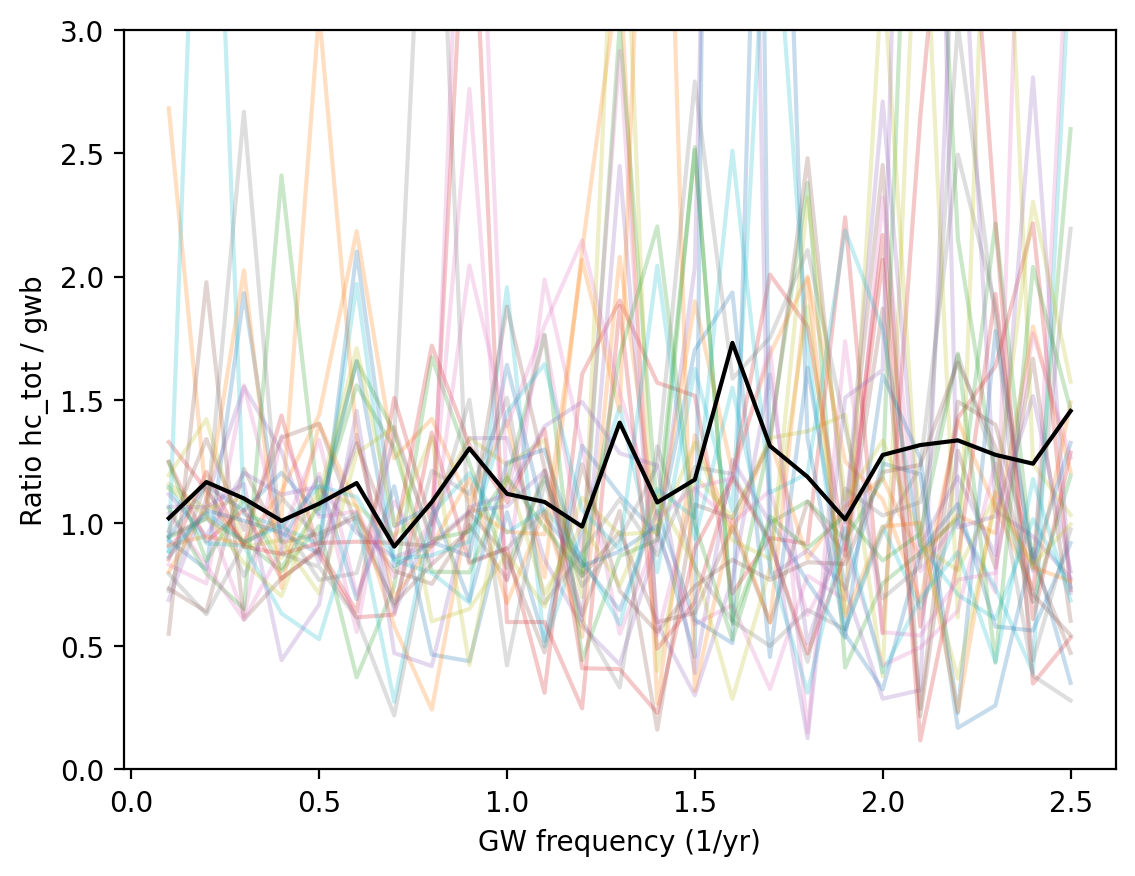

In [64]:
# print(hc_bg3.squeeze())
# print(gwb3.squeeze())
hc_tot3 = np.sqrt(np.sum(hc_ss3**2, axis=2)+ hc_bg3**2)
print(hc_tot3.shape)
print(gwb3.shape)
for rr in range(len(gwb3[0])):
    plt.plot(fobs3*YR, hc_tot3[:,rr]/gwb3[:,rr], label='hc_tot/gwb', alpha=0.25)

plt.plot(fobs3*YR, np.mean(hc_tot3/gwb3, axis=1), color='k')

plt.xlabel('GW frequency (1/yr)')
plt.ylabel('Ratio hc_tot / gwb')
plt.ylim(0,3)

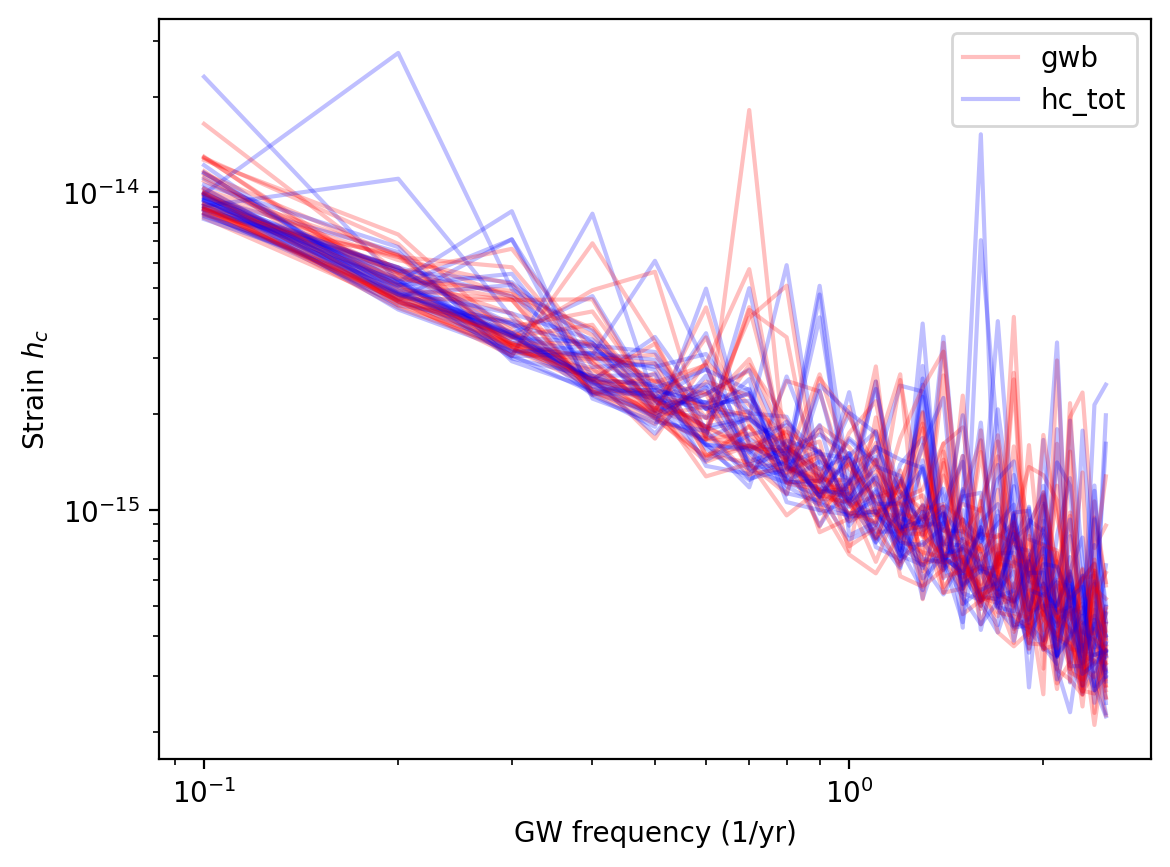

In [40]:
plt.xlabel('GW frequency (1/yr)')
plt.ylabel('Strain $h_c$')

rr=0
plt.loglog(fobs3*YR, gwb3[:,rr], color='red', alpha=0.25, label='gwb')
plt.loglog(fobs3*YR, hc_tot3[:,rr], color='b', alpha=0.25, label='hc_tot')
for rr in range(1,len(gwb3[0])):
    plt.loglog(fobs3*YR, gwb3[:,rr], color='red', alpha=0.25)
    plt.loglog(fobs3*YR, hc_tot3[:,rr], color='b', alpha=0.25)
plt.legend()

For the super simple example they match!!

### 4 Let's try full size SAM, more reals:

In [67]:
hc_ss4, hc_bg4 = sam3.ss_gwb(fobs_edges3, realize=100, loudest=10)
gwb4 = sam3.gwb(fobs_edges3, realize=100)

14:29:05 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
14:29:06 INFO : fraction of coalesced binaries: 2.24e+06/1.63e+07 = 1.38e-01 [sam.py:dynamic_binary_number]
14:29:06 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
edges[-1]: 7.92e-10, 2.06e-09, 6.54e-09, 2.06e-08, 3.47e-08, 3.91e-08, 4.04e-08
dnum: 0.00e+00, 0.00e+00, 0.00e+00, 4.36e-07, 2.00e+08, 1.83e+11, 1.62e+17
number: 0.00e+00, 0.00e+00, 0.00e+00, 1.45e-11, 2.96e+02, 3.10e+05, 4.89e+11
14:29:11 WARNING : Using `redz_prime` for redshift (includes galaxy merger time, but not evolution time) [sam.py:ss_gwb]
14:30:00 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
14:30:00 INFO : fraction of coalesced binaries: 2.24e+06/1.63e+07 = 1.38e-01 [sam.py:dynamic_binary_number]
14:30:00 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
edges[-1]: 7.92e-

(25, 100)
(25, 100)


(0.0, 3.0)

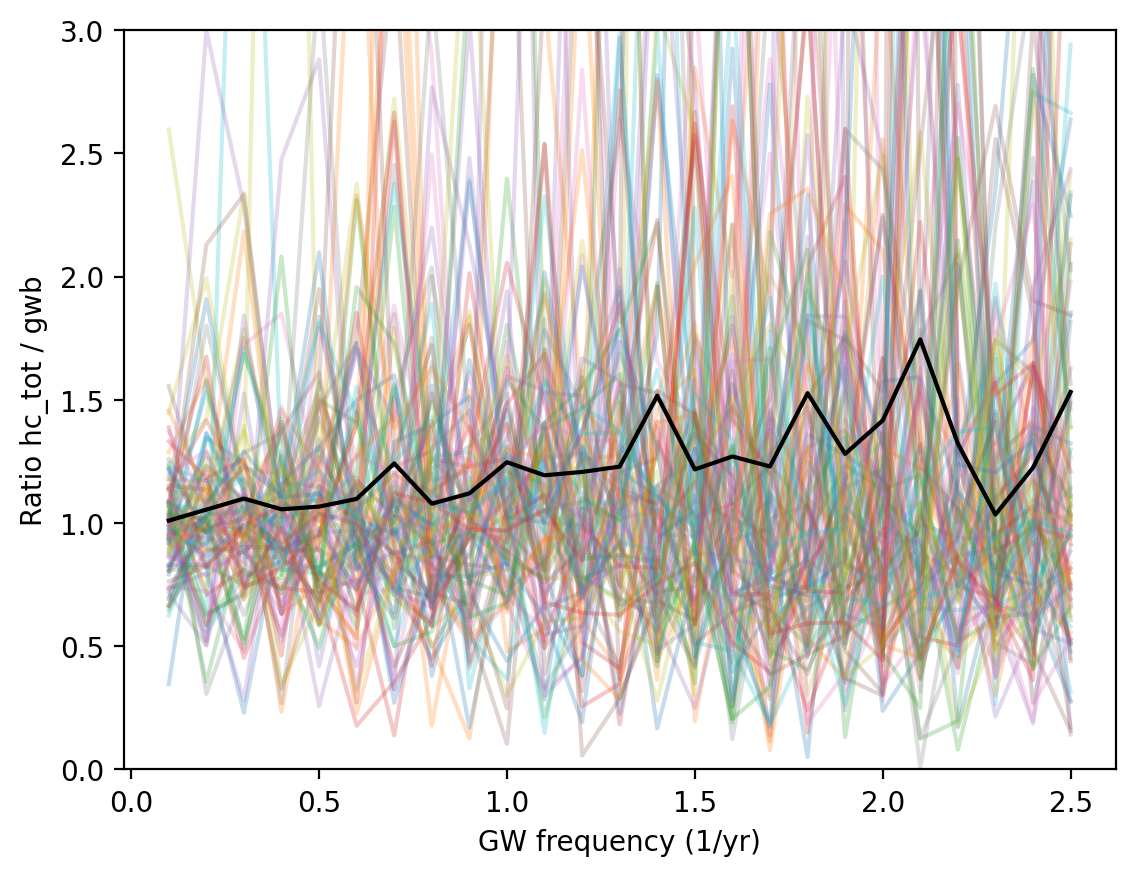

In [68]:
# print(hc_bg3.squeeze())
# print(gwb3.squeeze())
hc_tot4 = np.sqrt(np.sum(hc_ss4**2, axis=2)+ hc_bg4**2)
print(hc_tot4.shape)
print(gwb4.shape)
for rr in range(len(gwb4[0])):
    plt.plot(fobs3*YR, hc_tot4[:,rr]/gwb4[:,rr], label='hc_tot/gwb', alpha=0.25)

plt.plot(fobs3*YR, np.mean(hc_tot4/gwb4, axis=1), color='k')

plt.xlabel('GW frequency (1/yr)')
plt.ylabel('Ratio hc_tot / gwb')
plt.ylim(0,3)

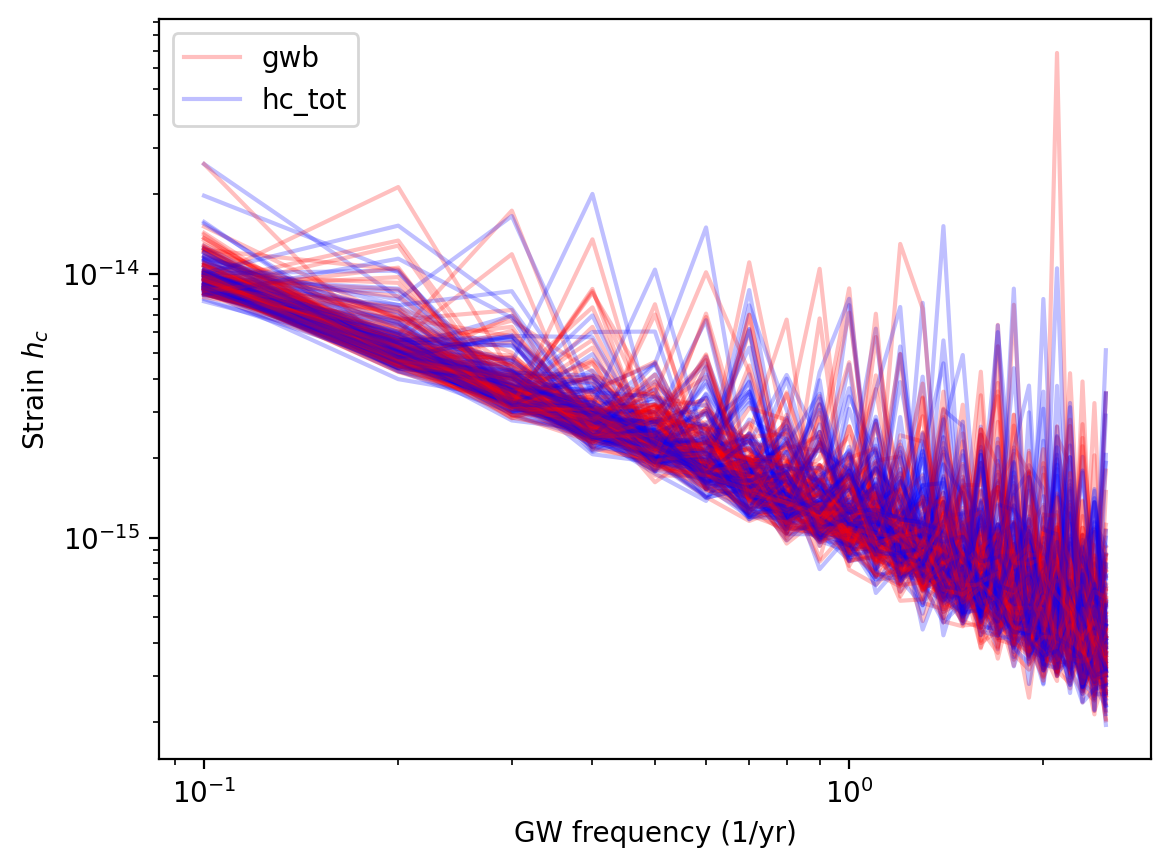

In [69]:
plt.xlabel('GW frequency (1/yr)')
plt.ylabel('Strain $h_c$')

rr=0
plt.loglog(fobs3*YR, gwb4[:,rr], color='red', alpha=0.25, label='gwb')
plt.loglog(fobs3*YR, hc_tot4[:,rr], color='b', alpha=0.25, label='hc_tot')
for rr in range(1,len(gwb4[0])):
    plt.loglog(fobs3*YR, gwb4[:,rr], color='red', alpha=0.25)
    plt.loglog(fobs3*YR, hc_tot4[:,rr], color='b', alpha=0.25)
plt.legend()

(25, 100)


Text(0, 0.5, 'sum2 = $\\sqrt{\\sum_L(hc_{ss4}^2) + hc_{bg4}^2}$')

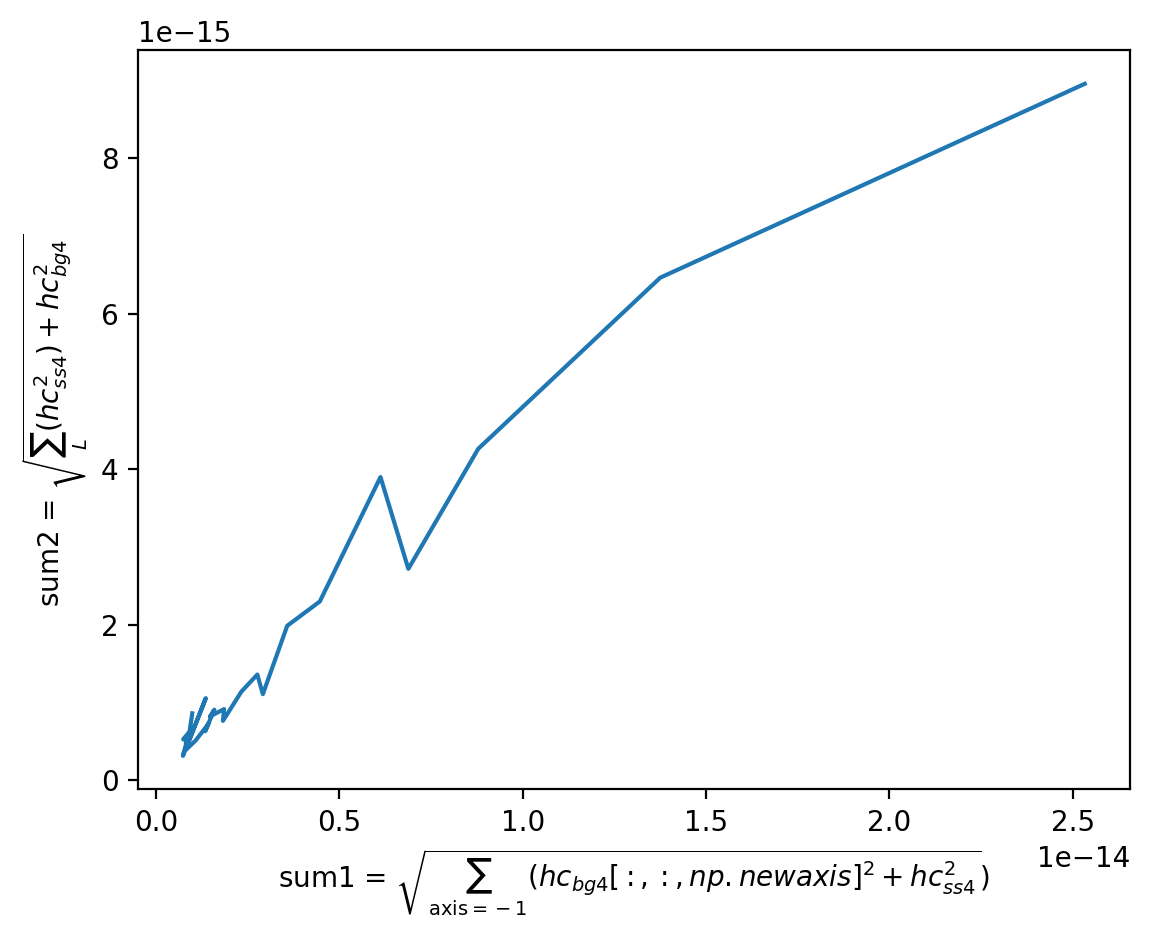

In [97]:
sum1 = np.sqrt(np.sum(hc_bg4[:, :, np.newaxis]**2 + hc_ss4**2, axis=-1))
print(sum1.shape)
sum2 = np.sqrt(np.sum(hc_ss4**2, axis=2) + hc_bg4**2)
# why are these not the exact same??
plt.plot(sum1[:,0], sum2[:,0])
plt.xlabel('sum1 = $\sqrt{\sum_\mathrm{axis=-1}(hc_{bg4}[:, :, np.newaxis]^2 + hc_{ss4}^2})$')
plt.ylabel('sum2 = $\sqrt{\sum_L(hc_{ss4}^2) + hc_{bg4}^2}$')

(25, 100)


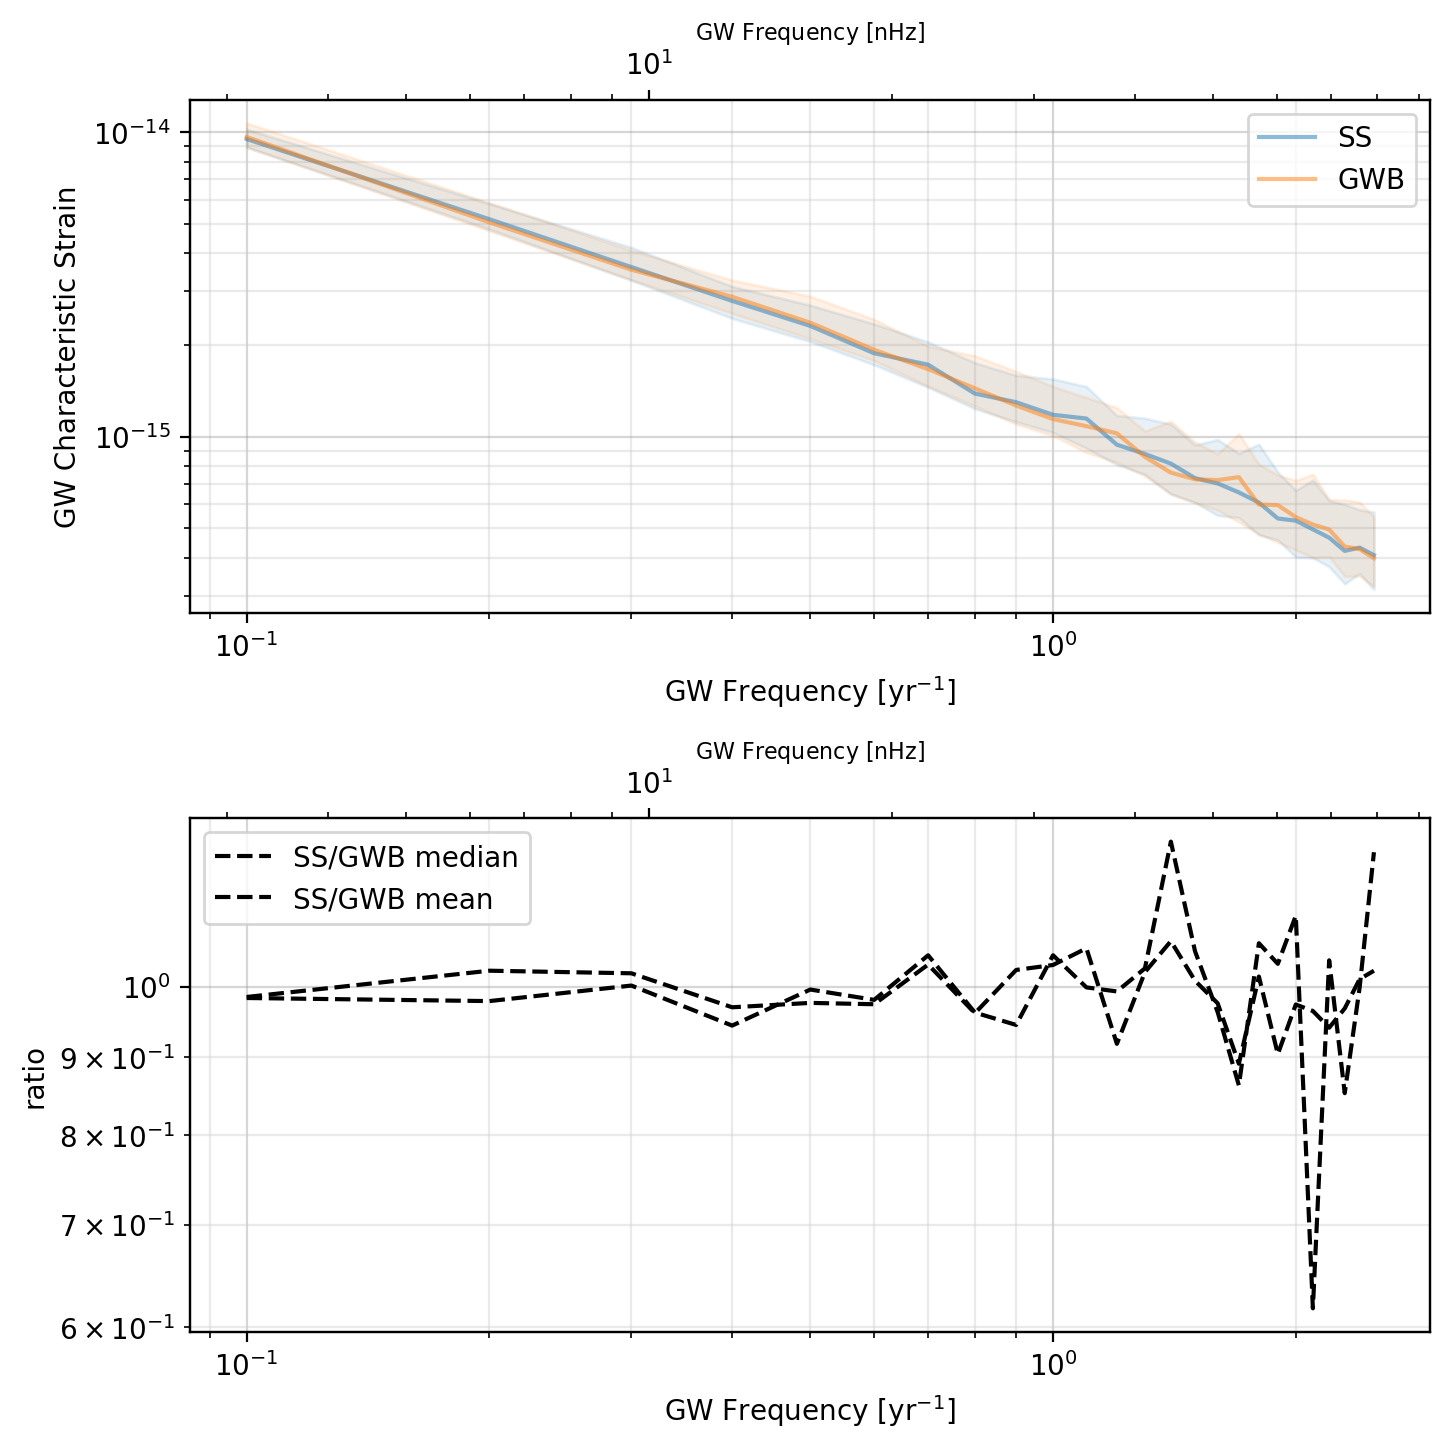

In [88]:
fig, axes = plot.figax(
    figsize=[8, 8], nrows=2, hspace=0.4,
    xlabel=plot.LABEL_GW_FREQUENCY_YR, ylabel=plot.LABEL_CHARACTERISTIC_STRAIN
)


xx = fobs3 * YR

# y1 = data['hc_bg']
# y1 = np.sqrt(np.sum(hc_bg4[:, :, np.newaxis]**2 + hc_ss4**2, axis=-1))
y1=hc_tot4
print(y1.shape)
y2 = gwb4

labels = ['SS', 'GWB']
for jj, yy in enumerate([y1, y2]):
    med, *conf = np.percentile(yy, [50, 25, 75], axis=-1)
    cc, = axes[0].plot(xx, med, alpha=0.5, label=labels[jj])
    cc = cc.get_color()
    axes[0].fill_between(xx, *conf, color=cc, alpha=0.1)

axes[1].plot(xx, np.median(y1, axis=-1)/np.median(y2, axis=-1), 'k--', label='SS/GWB median')
axes[1].plot(xx, np.mean(y1, axis=-1)/np.mean(y2, axis=-1), 'k--', label='SS/GWB mean')
        

axes[1].set_ylabel('ratio')
for ax in axes:
    ax.legend()
    plot._twin_hz(ax)
    
plt.show()

# Compare Old (noredz)

In [ ]:
def run_single_params_model(space, params, fobs_edges, nreals=100, nloudest=5):
    param_names = space.param_names
    log = space._log
    
    pars = {name: params[pp] for pp, name in enumerate(param_names)}

    log.info(f"Loading sam and hard from {params=}")
    sam, hard = space.model_for_params(pars, sam_shape=space.sam_shape)

    fobs_cents = utils.midpoints(fobs_edges, log=False)
    fobs_orb_edges = fobs_edges / 2.0
    fobs_orb_cents = fobs_cents / 2.0

    log.info(f"Calculating `dynamic_binary_number` for {fobs_cents.size} freqs")
    edges, dnum = sam.dynamic_binary_number(hard, fobs_orb=fobs_orb_cents)
    edges[-1] = fobs_orb_edges

    # integrate for number
    log.debug(f"integrating to get number of binaries")
    number = utils._integrate_grid_differential_number(edges, dnum, freq=False)
    number = number * np.diff(np.log(fobs_edges))

    log.debug(f"calculating strains and sources for shape ({fobs_cents.size}, {nreals}), {nloudest=}")
    hc_ss, hc_bg, sspar, bgpar = holo.single_sources.ss_gws(
        edges, number, realize=nreals, loudest=nloudest, params=True
    )

    # use_redz = sam._redz_final
    # gwb = holo.gravwaves._gws_from_number_grid_integrated(edges, use_redz, number, nreals)

    gwb = holo.gravwaves._gws_from_number_grid_integrated(edges, number, nreals)

    data = dict(
        fobs=fobs_cents, fobs_edges=fobs_edges,
        gwb=gwb, hc_ss=hc_ss, hc_bg=hc_bg, sspar=sspar, bgpar=bgpar
    )
    return data


def run_params_subspace(space, params, fobs_edges, **kwargs):
    log = space._log
    param_names = space.param_names
    npars = len(param_names)
    params = np.asarray(params)

    # Make sure shapes look good
    if params.ndim != 2 or params.shape[1] != npars:
        err = f"`params` shape {np.shape(params)} does not match {npars} parameters: {param_names}!"
        log.exception(err)
        raise RuntimeError(err)

    # Make sure all parameters are within excepted bounds
    for pp, name in enumerate(param_names):
        dist = space._dists[pp]

        bads = (params[:, pp] <= dist.extrema[0]) | (dist.extrema[1] <= params[:, pp])
        if np.any(bads):
            err = f"`params` {pp} {name} are outside of extrema [{dist.extrema[0]:.8e}, {dist.extrema[1]:.8e}]!"
            err += f"  {utils.stats(params[:, pp])}"
            log.exception(err)
            raise ValueError(err)

    num_samps = params.shape[0]

    all_data = []
    for ii in tqdm.trange(num_samps):
        data = run_single_params_model(space, params[ii], fobs_edges, **kwargs)
        all_data.append(data)

    return all_data


NUM_FBINS = 14
PTA_DUR = 16.03     # [yrs]
SHAPE = 40
NREALS = 50

space_class = holo.param_spaces.PS_Broad_Uniform_02B
space = space_class(holo.log, 0, SHAPE, None)

dur = PTA_DUR * YR
pta_cad = dur / (2 * NUM_FBINS)
fobs_edges = holo.utils.nyquist_freqs_edges(dur, pta_cad)

draw_params = [
    [ 4.57784231, -1.51291368, 10.90450461,  8.85735088,  0.52998213],
    [ 6.96691128, -2.38054765, 11.08484247,  9.29421616,  0.45471499],
    [ 0.37454247, -2.10501603, 11.62087475,  8.84882612,  0.09778727]
]

# Run full set of `draw_params`
# all_data = run_params_subspace(space, draw_params[:4], fobs_edges, nreals=NREALS)

single_data = run_single_params_model(space, draw_params[0], fobs_edges, nreals=NREALS)


19:42:57 INFO : Loading sam and hard from params=[4.57784231, -1.51291368, 10.90450461, 8.85735088, 0.52998213] [2167385378.py:run_single_params_model]
19:42:57 WARNING : class `Fixed_Time` has been deprecated!  Please use `Fixed_Time_2PL` with new parametrization! [hardening.py:__init__]
19:42:57 INFO : calculating normalization exactly [hardening.py:__init__]
19:43:05 INFO : Calculating `dynamic_binary_number` for 14 freqs [2167385378.py:run_single_params_model]
19:43:05 INFO : zero_coalesced=False, zero_stalled=True [sam.py:dynamic_binary_number]
19:43:05 INFO : Stalled SAM bins based on GMT: 4.80e+04/6.40e+04 = 7.50e-01 [sam.py:static_binary_density]
19:43:05 INFO : Adding MMbulge scatter (5.2998e-01) [sam.py:static_binary_density]
19:43:05 INFO : 	dens bef: (0.00e+00, 2.28e-273, 1.31e-51, 2.01e-04, 1.54e-02, 7.61e-02, 4.57e-01) [sam.py:static_binary_density]
19:43:06 INFO : Scatter added after 0.898399 sec [sam.py:static_binary_density]
19:43:06 INFO : 	dens aft: (3.38e-20, 4.70e-

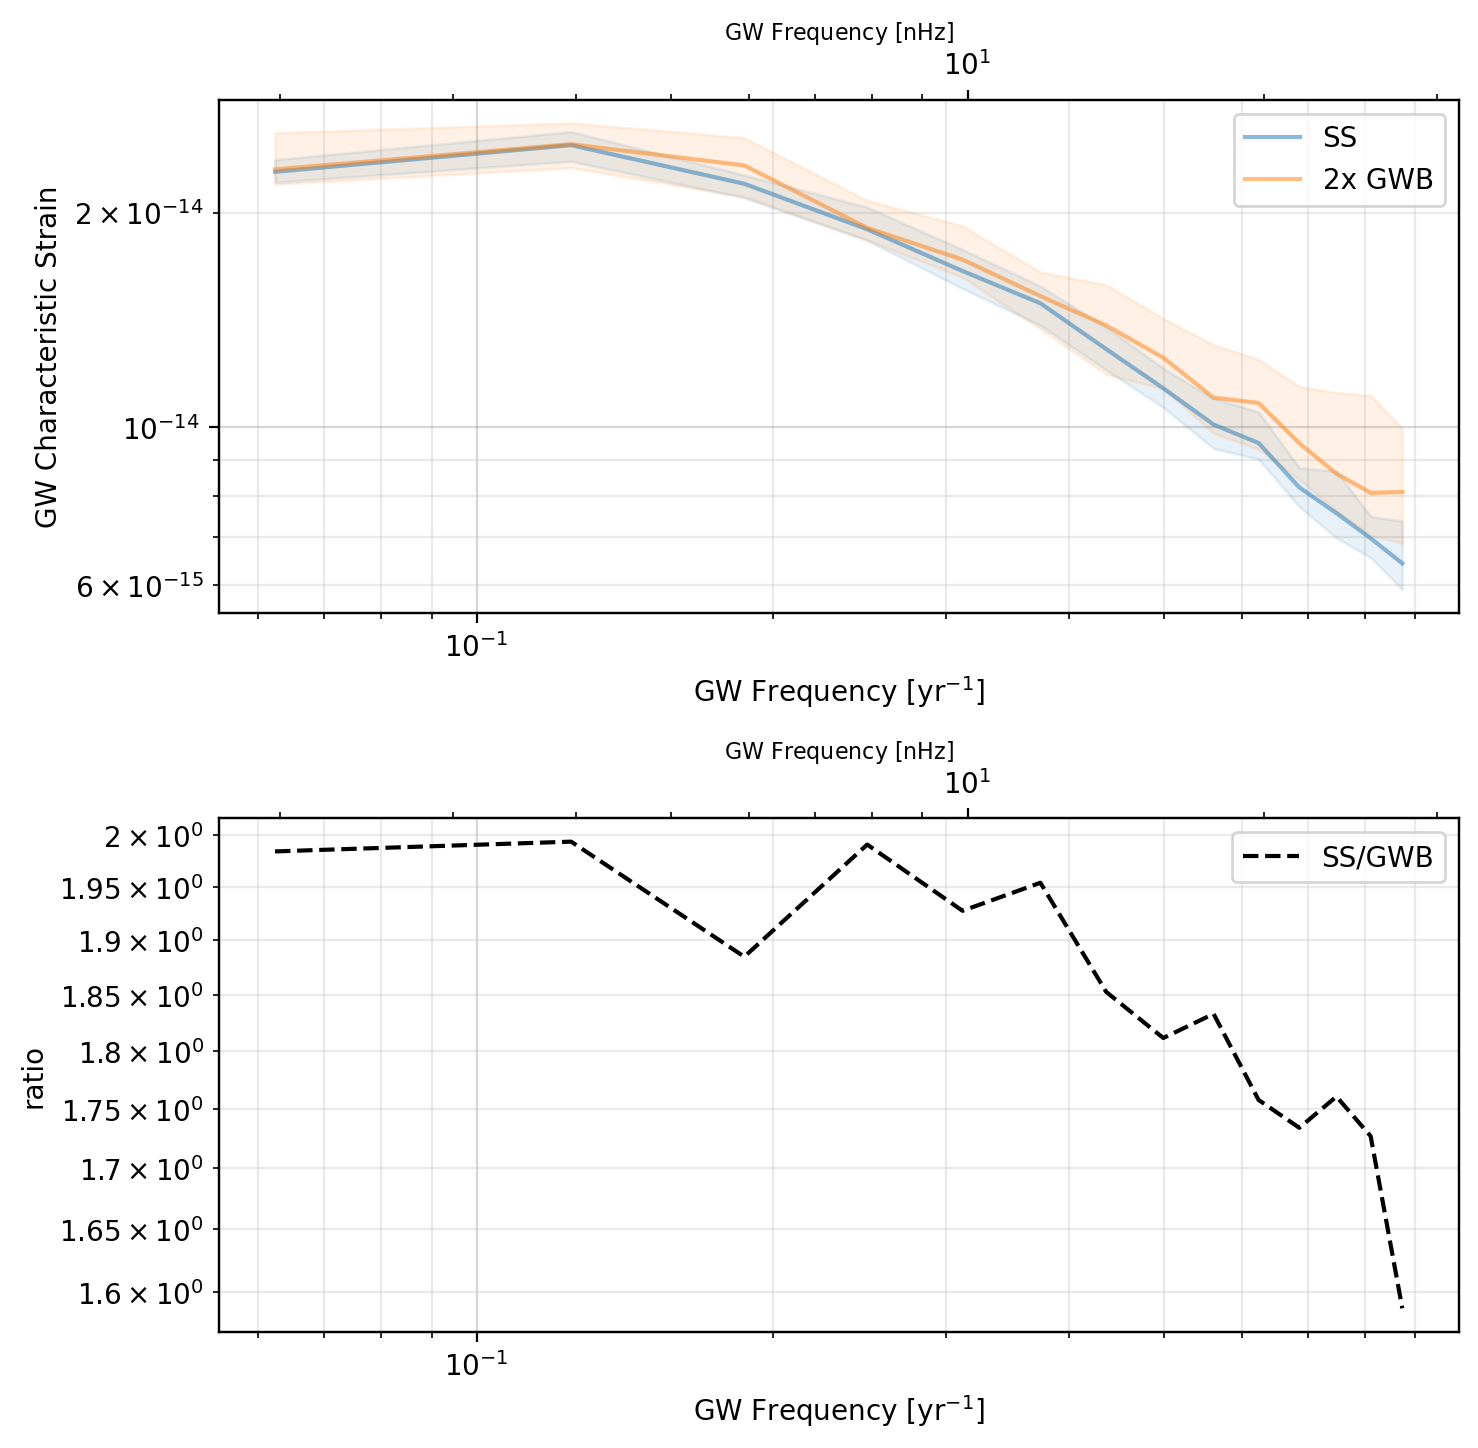

In [ ]:
fig, axes = plot.figax(
    figsize=[8, 8], nrows=2, hspace=0.4,
    xlabel=plot.LABEL_GW_FREQUENCY_YR, ylabel=plot.LABEL_CHARACTERISTIC_STRAIN
)


xx = single_data['fobs'] * YR

# y1 = data['hc_bg']
y1 = np.sqrt(np.sum(single_data['hc_bg'][:, :, np.newaxis]**2 + single_data['hc_ss']**2, axis=-1))
y2 = single_data['gwb']

labels = ['SS', '2x GWB']
for jj, yy in enumerate([y1, 2*y2]):
    med, *conf = np.percentile(yy, [50, 25, 75], axis=-1)
    cc, = axes[0].plot(xx, med, alpha=0.5, label=labels[jj])
    cc = cc.get_color()
    axes[0].fill_between(xx, *conf, color=cc, alpha=0.1)

axes[1].plot(xx, np.median(y1, axis=-1)/np.median(y2, axis=-1), 'k--', label='SS/GWB')
        

axes[1].set_ylabel('ratio')
for ax in axes:
    ax.legend()
    plot._twin_hz(ax)
    
plt.show()

# Compare New redz funcs

In [42]:
def run_single_params_model_new(space, params, fobs_edges, nreals=100, nloudest=5):
    param_names = space.param_names
    log = space._log
    
    pars = {name: params[pp] for pp, name in enumerate(param_names)}

    log.info(f"Loading sam and hard from {params=}")
    sam, hard = space.model_for_params(pars, sam_shape=space.sam_shape)

    fobs_cents = utils.midpoints(fobs_edges, log=False)
    fobs_orb_edges = fobs_edges / 2.0
    fobs_orb_cents = fobs_cents / 2.0

    # log.info(f"Calculating `dynamic_binary_number` for {fobs_cents.size} freqs")
    # edges, dnum = sam.dynamic_binary_number(hard, fobs_orb=fobs_orb_cents)
    # edges[-1] = fobs_orb_edges

    # # integrate for number
    # log.debug(f"integrating to get number of binaries")
    # number = utils._integrate_grid_differential_number(edges, dnum, freq=False)
    # number = number * np.diff(np.log(fobs_edges))

    log.debug(f"calculating strains and sources for shape ({fobs_cents.size}, {nreals}), {nloudest=}")
    hc_ss, hc_bg, sspar, bgpar = sam.ss_gwb(fobs_edges, hard=hard, realize=nreals, loudest=nloudest, params=True)

    # use_redz = sam._redz_final
    # gwb = holo.gravwaves._gws_from_number_grid_integrated(edges, use_redz, number, nreals)

    gwb = sam.gwb(fobs_edges, hard=hard, realize=nreals)

    data = dict(
        fobs=fobs_cents, fobs_edges=fobs_edges,
        gwb=gwb, hc_ss=hc_ss, hc_bg=hc_bg, sspar=sspar, bgpar=bgpar
    )
    return data


def run_params_subspace(space, params, fobs_edges, **kwargs):
    log = space._log
    param_names = space.param_names
    npars = len(param_names)
    params = np.asarray(params)

    # Make sure shapes look good
    if params.ndim != 2 or params.shape[1] != npars:
        err = f"`params` shape {np.shape(params)} does not match {npars} parameters: {param_names}!"
        log.exception(err)
        raise RuntimeError(err)

    # Make sure all parameters are within excepted bounds
    for pp, name in enumerate(param_names):
        dist = space._dists[pp]

        bads = (params[:, pp] <= dist.extrema[0]) | (dist.extrema[1] <= params[:, pp])
        if np.any(bads):
            err = f"`params` {pp} {name} are outside of extrema [{dist.extrema[0]:.8e}, {dist.extrema[1]:.8e}]!"
            err += f"  {utils.stats(params[:, pp])}"
            log.exception(err)
            raise ValueError(err)

    num_samps = params.shape[0]

    all_data = []
    for ii in tqdm.trange(num_samps):
        data = run_single_params_model(space, params[ii], fobs_edges, **kwargs)
        all_data.append(data)

    return all_data


NUM_FBINS = 14
PTA_DUR = 16.03     # [yrs]
SHAPE = 40
NREALS = 50

space_class = holo.param_spaces.PS_Broad_Uniform_02B
space = space_class(holo.log, 0, SHAPE, None)

dur = PTA_DUR * YR
pta_cad = dur / (2 * NUM_FBINS)
fobs_edges = holo.utils.nyquist_freqs_edges(dur, pta_cad)

draw_params = [
    [ 4.57784231, -1.51291368, 10.90450461,  8.85735088,  0.52998213],
    [ 6.96691128, -2.38054765, 11.08484247,  9.29421616,  0.45471499],
    [ 0.37454247, -2.10501603, 11.62087475,  8.84882612,  0.09778727]
]

# Run full set of `draw_params`
# all_data = run_params_subspace(space, draw_params[:4], fobs_edges, nreals=NREALS)

single_data = run_single_params_model_new(space, draw_params[0], fobs_edges, nreals=NREALS)


14:18:27 INFO : Loading sam and hard from params=[4.57784231, -1.51291368, 10.90450461, 8.85735088, 0.52998213] [1447586233.py:run_single_params_model_new]
14:18:27 WARNING : class `Fixed_Time` has been deprecated!  Please use `Fixed_Time_2PL` with new parametrization! [hardening.py:__init__]
14:18:27 INFO : calculating normalization exactly [hardening.py:__init__]
14:18:34 INFO : zero_coalesced=False, zero_stalled=True [sam.py:dynamic_binary_number]
14:18:34 INFO : Stalled SAM bins based on GMT: 4.80e+04/6.40e+04 = 7.50e-01 [sam.py:static_binary_density]
14:18:34 INFO : Adding MMbulge scatter (5.2998e-01) [sam.py:static_binary_density]
14:18:34 INFO : 	dens bef: (0.00e+00, 2.28e-273, 1.31e-51, 2.01e-04, 1.54e-02, 7.61e-02, 4.57e-01) [sam.py:static_binary_density]
14:18:35 INFO : Scatter added after 0.894214 sec [sam.py:static_binary_density]
14:18:35 INFO : 	dens aft: (3.38e-20, 4.70e-10, 5.18e-07, 1.81e-03, 3.38e-02, 1.07e-01, 3.13e-01) [sam.py:static_binary_density]
14:18:35 INFO : 

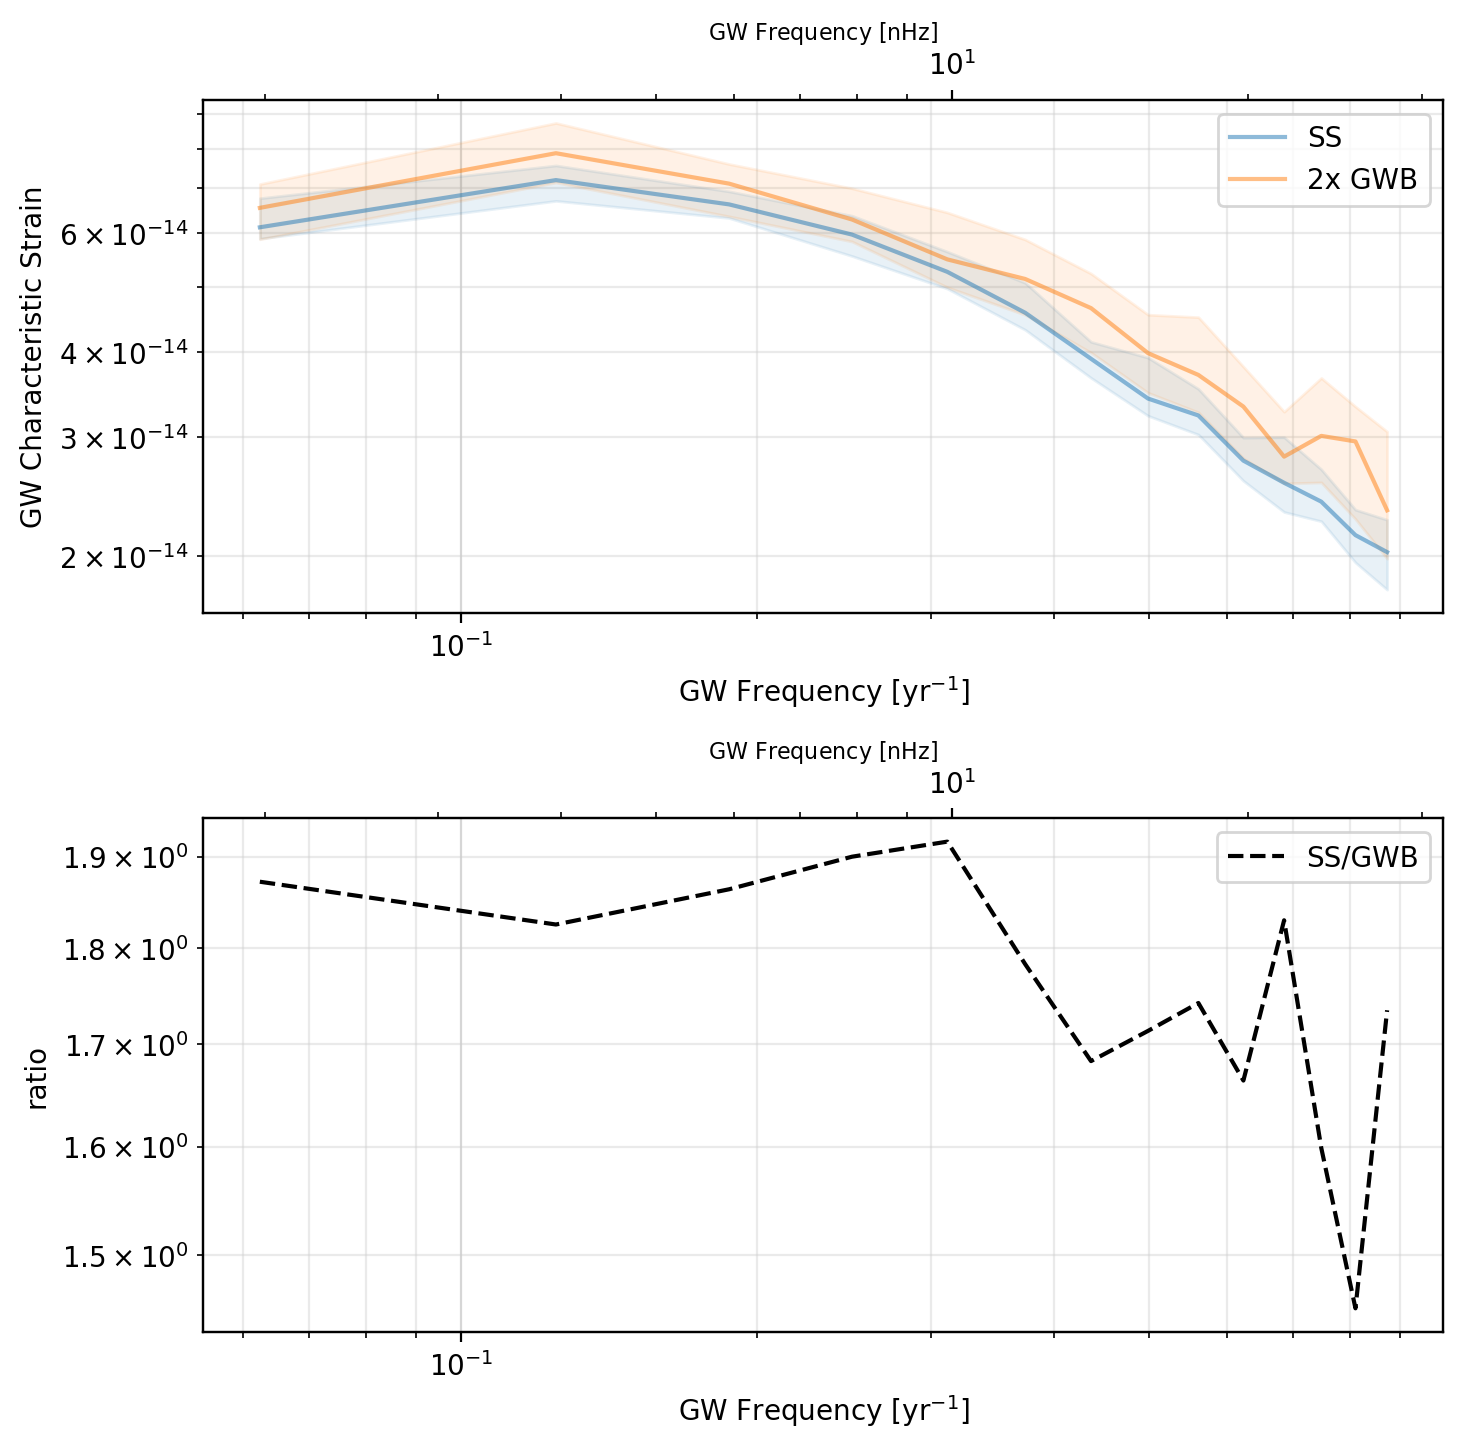

In [43]:
fig, axes = plot.figax(
    figsize=[8, 8], nrows=2, hspace=0.4,
    xlabel=plot.LABEL_GW_FREQUENCY_YR, ylabel=plot.LABEL_CHARACTERISTIC_STRAIN
)


xx = single_data['fobs'] * YR

# y1 = data['hc_bg']
y1 = np.sqrt(np.sum(single_data['hc_bg'][:, :, np.newaxis]**2 + single_data['hc_ss']**2, axis=-1))
y2 = single_data['gwb']

labels = ['SS', '2x GWB']
for jj, yy in enumerate([y1, 2*y2]):
    med, *conf = np.percentile(yy, [50, 25, 75], axis=-1)
    cc, = axes[0].plot(xx, med, alpha=0.5, label=labels[jj])
    cc = cc.get_color()
    axes[0].fill_between(xx, *conf, color=cc, alpha=0.1)

axes[1].plot(xx, np.median(y1, axis=-1)/np.median(y2, axis=-1), 'k--', label='SS/GWB')
        

axes[1].set_ylabel('ratio')
for ax in axes:
    ax.legend()
    plot._twin_hz(ax)
    
plt.show()